In [ ]:
!pip install -q transformers

In [ ]:
!pip install -q youtube_transcript_api
!pip install --upgrade googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=edfdf0ce398fb181db1bc4a95c1dc7910af2c03608af2e7544a4fe6c9ce4cc22
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi
from googletrans import Translator


In [ ]:
youtube_video = "https://www.youtube.com/watch?v=52IFAhVeF9E"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'52IFAhVeF9E'

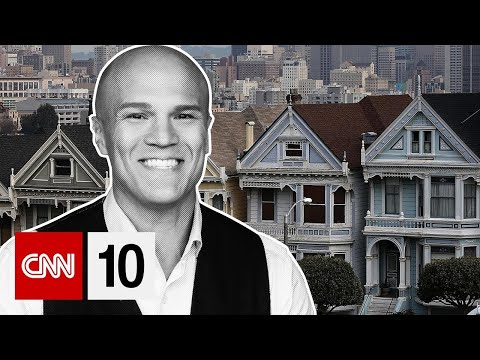

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [ ]:
transcript[0:5]

[{'text': '[Music]', 'start': 0.0, 'duration': 2.94},
 {'text': '[Applause]', 'start': 2.97, 'duration': 3.079},
 {'text': 'hello everyone terrific Tuesday to you',
  'start': 11.639,
  'duration': 4.521},
 {'text': "welcome back to CNN 10 I'm your host Koy",
  'start': 13.799,
  'duration': 4.4},
 {'text': "wire we've got a lot to get to not a lot",
  'start': 16.16,
  'duration': 3.76}]

In [ ]:

result = ""
for i in transcript:
    result += ' ' + i['text']
print(result)
print(len(result))

 [Music] [Applause] hello everyone terrific Tuesday to you welcome back to CNN 10 I'm your host Koy wire we've got a lot to get to not a lot of time to do it so let's get right to it we start today talking about the current housing market in the United States the dream of buying a home in America is becoming more expensive High mortgage rates Rising home pric prices in low home Inventory are pushing home ownership further Out Of Reach for firsttime buyers a new bank rate analysis says Americans wanting to buy a medium-priced home need to make at least $110,000 a year that's almost a 50% increase in the last four years this changes the calculation for potential home buyers who are torn between buying or renting a home here's redfin.com Chief Economist darl Fairweather with more right now it is more affordable to rent than it is to pay for a mortgage and historically that hasn't been true but if the mortgage payment that you would have to pay is less than 30% of your monthly income then 

In [ ]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", tokenizer="facebook/bart-large-cnn")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 [Music] [Applause] hello everyone terrific Tuesday to you welcome back to CNN 10 I'm your host Koy wire we've got a lot to get to not a lot of time to do it so let's get right to it we start today talking about the current housing market in the United States the dream of buying a home in America is becoming more expensive High mortgage rates Rising home pric prices in low home Inventory are pushing home ownership further Out Of Reach for firsttime buyers a new bank rate analysis says Americans wanting to buy a medium-priced home need to make at least $110,000 a year that's almost a 50% increase in the last four years this changes the calculation for potential home buyers who are torn between buying or renting a home here's redfin.com Chief Economist darl Fairweather with more right now it is more affordable to rent than it is to pay for a mortgage and historically that hasn't been true but if the mortgage payment that you would have to pay is less than 30% of your monthly 

In [ ]:
len(str(summarized_text))

2700

In [ ]:
str(summarized_text)


'[\'High mortgage rates are pushing home ownership further Out Of Reach for firsttime buyers. Americans wanting to buy a medium-priced home need to make at least $110,000 a year. Right now it is more affordable to rent than it is to pay for a mortgage.\', "Mortgage rates have started to fall and also more listings of homes are coming on the market which means there are more options for buyers. We are forecasting a slight correction in prices this year down 1% but it\'s just not enough to really make Make It or Break It for a home buyer it\'s probably going to keep getting less affordable.", "Vatican City is officially the smallest country in the world and roughly the size of 82 football [Music] fields move over Pisa there\'s another Leaning Tower in Italy built in the 12th century the garisenda tower in bolognia Italy started tilting just two centuries later it now leans at a 4° angle slightly more than the Tower of Pisa currently.", "The Tower of Pisa is set to undergo a multi-year re

In [ ]:
from googletrans import Translator

In [ ]:
translator= Translator()

In [ ]:
translated_summary = []
for text_part in summarized_text:
    translation = translator.translate(text_part, dest='te').text
    translated_summary.append(translation)

print(len(str(text_part)))

print("\nTranslated Summary:")

for part in translated_summary:
    print(part)
print(len(str(translated_summary)))

379

Translated Summary:
అధిక తనఖా రేట్లు మొదటిసారి కొనుగోలు చేసేవారికి ఇంటి యాజమాన్యాన్ని మరింత అందుబాటులోకి తెచ్చాయి. మీడియం-ధర గృహాన్ని కొనుగోలు చేయాలనుకునే అమెరికన్లు సంవత్సరానికి కనీసం $110,000 సంపాదించాలి. ప్రస్తుతం తనఖా కోసం చెల్లించడం కంటే అద్దెకు ఇవ్వడం చాలా సరసమైనది.
తనఖా రేట్లు తగ్గడం ప్రారంభించాయి మరియు మరిన్ని గృహాల జాబితాలు మార్కెట్లోకి వస్తున్నాయి అంటే కొనుగోలుదారులకు మరిన్ని ఎంపికలు ఉన్నాయి. మేము ఈ సంవత్సరం ధరలలో 1% తగ్గుదలని అంచనా వేస్తున్నాము, అయితే ఇది నిజంగా మేక్ ఇట్ లేదా బ్రేక్ ఇట్‌ని ఇంటి కొనుగోలుదారు కోసం తయారు చేయడం సరిపోదు, ఇది బహుశా తక్కువ సరసమైన ధరను పొందుతూనే ఉంటుంది.
వాటికన్ సిటీ అధికారికంగా ప్రపంచంలోనే అతి చిన్న దేశం మరియు దాదాపు 82 ఫుట్‌బాల్ [సంగీతం] మైదానాల పరిమాణం పీసా మీదుగా కదులుతుంది, 12వ శతాబ్దంలో ఇటలీలో మరో లీనింగ్ టవర్ నిర్మించబడింది, ఇటలీలోని బోలోగ్నియాలోని గరిసెండా టవర్ కేవలం రెండు శతాబ్దాల తర్వాత అది వంగిపోవడం ప్రారంభించింది. ప్రస్తుతం పిసా టవర్ కంటే కొంచెం ఎక్కువ 4° కోణంలో.
పిసా టవర్ బహుళ-సంవత్సరాల పునరుద్ధరణ ప్రాజెక్ట్‌ను చేపట్టడానికి సిద్ధంగ